<a href="https://colab.research.google.com/github/BaishaliChetia/CapsNet-Keras/blob/master/VGGprunedMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tempfile
import os

import tensorflow as tf
import numpy as np

from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [12]:
pip install -q tensorflow-model-optimization

     |████████████████████████████████| 211 kB 5.1 MB/s 


In [22]:
import tensorflow_model_optimization as tfmot

In [16]:
tf.random.set_seed(500000)

In [17]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the input image so that each pixel value is between 0 and 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [18]:
train_X =[]

for i in range(train_images.shape[0]):
  train_pad = np.pad(train_images[i], pad_width=10 , mode= 'edge')
  #print(train_pad)
  train_X.append(train_pad)
#PADDING test images
test_X = []
for i in range(test_images.shape[0]):
  test_pad = np.pad(test_images[i], pad_width=10 , mode= 'edge')
  #print(train_pad)
  test_X.append(test_pad)
train_X = np.array(train_X)
test_X = np.array(test_X)
train_X.shape, test_X.shape

((60000, 48, 48), (10000, 48, 48))

In [19]:
train_X=np.dstack([train_X] * 3)
test_X=np.dstack([test_X]*3)
train_X.shape,test_X.shape

((60000, 48, 144), (10000, 48, 144))

In [20]:
train_X = train_X.reshape(-1, 48,48,3)
test_X= test_X.reshape (-1,48,48,3)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X.shape,test_X.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [ ]:
from keras.callbacks import ModelCheckpoint, CSVLogger
#comparison_metric = MyAccuracy()
#checkpoint_filepath = "/content/drive/MyDrive/Weights/weights-improvement-{epoch:02d}-{val_my_accuracy:.2f}.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath = "/content/drive/MyDrive/MnistResults/vggfine_best_weights4.hdf5",
        save_weights_only=True,
        monitor="val_accuracy",
        #monitor="val_my_accuracy_19",
        mode='max',
        save_best_only=True)
model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
        filepath = "/content/drive/MyDrive/MnistResults/vggfine_latest_weights4.hdf5",
        save_weights_only=True,
        monitor="val_accuracy",
        mode='max',
        save_best_only=False)
log_csv = CSVLogger("/content/drive/MyDrive/MnistResults/vggfine_mylogs4.csv", separator = ",", append = False)
callback_list = [model_checkpoint_callback, model_checkpoint_callback2, log_csv]

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
vggModel = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

vggModel.trainable = False

In [ ]:
# Define the model architecture.
model = keras.Sequential([
  vggModel,
  keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(50, activation = 'relu'),
  keras.layers.Dense(10, activation = 'softmax')
])

# Train the digit classification model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(
  train_X,
  train_labels,
  epochs= 50,
  validation_split=0.1, callbacks = callback_list
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1688/1688 [==============================] - 34s 20ms/step - loss: 0.4365 - accuracy: 0.8613 - val_loss: 0.1522 - val_accuracy: 0.9583
Epoch 2/50
1688/1688 [==============================] - 33s 20ms/step - loss: 0.1946 - accuracy: 0.9481 - val_loss: 0.1226 - val_accuracy: 0.9653
Epoch 3/50
1688/1688 [==============================] - 33s 20ms/step - loss: 0.1564 - accuracy: 0.9584 - val_loss: 0.1341 - val_accuracy: 0.9687
Epoch 4/50
1688/1688 [==============================] - 33s 20ms/step - loss: 0.1349 - accuracy: 0.9650 - val_loss: 0.1057 - val_accuracy: 0.9718
Epoch 5/50
1688/1688 [==============================] - 33s 20ms/step - loss: 0.1265 - accuracy: 0.9663 - val_loss: 0.1416 - val_accuracy: 0.9635
Epoch 6/50
1688/1688 [==============================] - 33s 20ms/step - loss: 0.1196 - accuracy: 0.9685 - val_loss: 0.1154 - val_accuracy: 0.9757
Epoch 7/50
1688/1688 [==============================] - 34s 20ms/step - loss: 0.1092 - accuracy: 0.9711 - val_loss: 0.0890 - val_accura

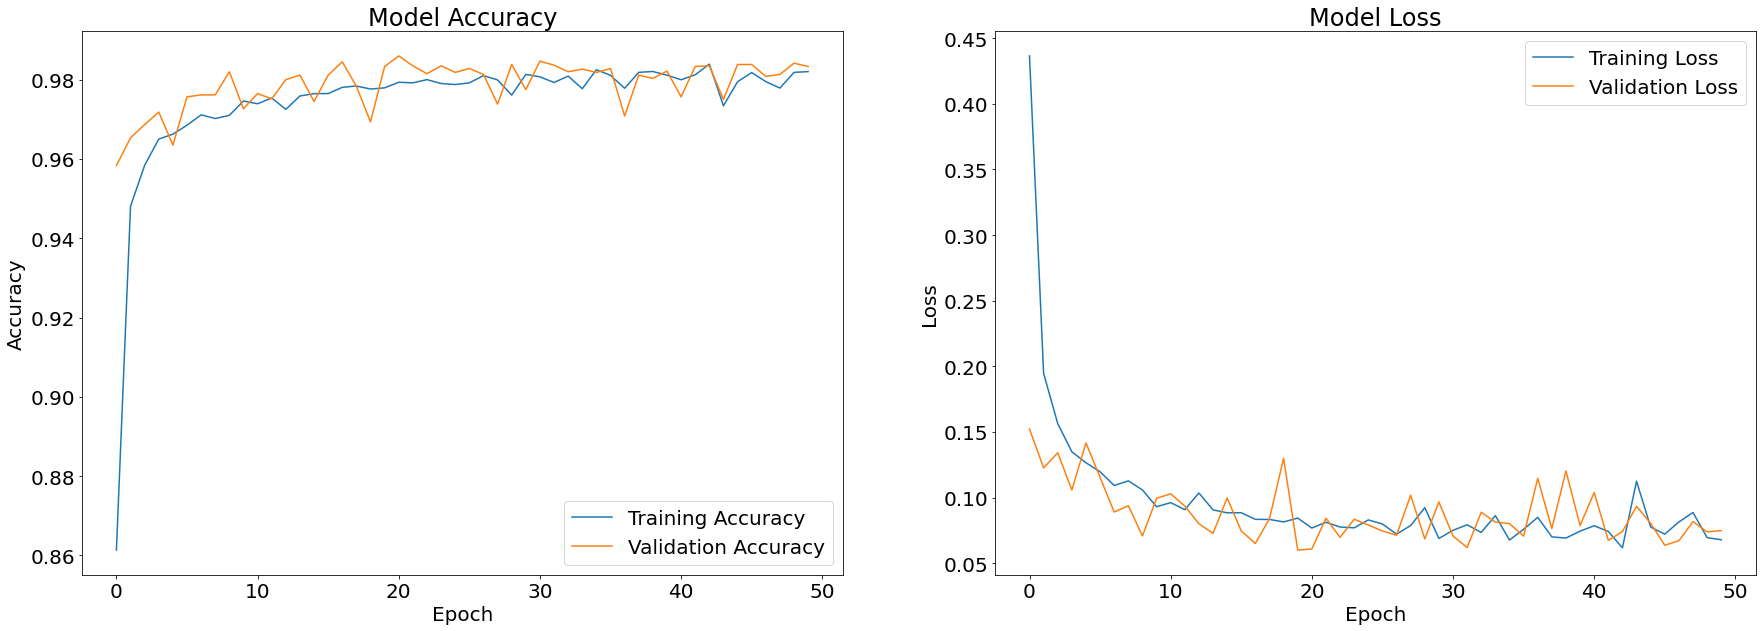

In [10]:

vggAccData = pd.read_csv("/content/drive/MyDrive/MnistResults/vggfine_mylogs4.csv")
plt.rcParams["figure.figsize"] = (30, 10)
plt.rcParams["font.size"] = 20

fig, ax = plt.subplots(1, 2)

ax[0].plot(vggAccData['accuracy'])
ax[0].plot(vggAccData['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Training Accuracy', 'Validation Accuracy'], loc='best')

ax[1].plot(vggAccData['loss'])
ax[1].plot(vggAccData['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show()

In [ ]:
_, baseline_model_accuracy = model.evaluate(
    test_X, test_labels, verbose=1)

313/313 [==============================] - 3s 10ms/step - loss: 0.1203 - accuracy: 0.9832


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 50)                12850     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                510       
Total params: 14,859,376
Trainable params: 13,123,888
Non-trainable params: 1,735,488
__________________________________

In [ ]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 128
epochs = 2
validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = train_images.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs
pruning_params = {
        'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                                final_sparsity=0.80,
                                                                begin_step=0,
                                                                end_step=end_step)
  }
  
# Define model for pruning.
model_for_pruning = prune_low_magnitude(model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#model_for_pruning.summary()
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

model_for_pruning.fit(train_X, train_labels,
                  batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)
_, model_for_pruning_accuracy = model_for_pruning.evaluate(
  test_X, test_labels, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2191: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


422/422 [==============================] - 32s 58ms/step - loss: 0.6220 - accuracy: 0.7573 - val_loss: 0.2255 - val_accuracy: 0.9777
Epoch 2/2
422/422 [==============================] - 23s 54ms/step - loss: 0.1579 - accuracy: 0.9574 - val_loss: 0.1496 - val_accuracy: 0.9832


In [ ]:
vggfine_baseModel = model.save("/content/drive/MyDrive/MnistResults/vggfine_save_basemodel4.tf", save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MnistResults/vggfine_save_basemodel4.tf/assets


In [ ]:
finalSparsity = 0.05
list_accuracy0 = []
while finalSparsity <= 0.95:
  model.load_weights('/content/drive/MyDrive/MnistResults/vggfine_best_weights4.hdf5')
  pruning_params = {
        'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.0,
                                                                final_sparsity=finalSparsity,
                                                                begin_step=0,
                                                                end_step=end_step)
  }
  
  # Define model for pruning.
  model_for_pruning = prune_low_magnitude(model, **pruning_params)

  # `prune_low_magnitude` requires a recompile.
  model_for_pruning.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  #model_for_pruning.summary()
  logdir = tempfile.mkdtemp()

  callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
  ]

  model_for_pruning.fit(train_X, train_labels,
                    batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                    callbacks=callbacks)
  _, model_for_pruning_accuracy = model_for_pruning.evaluate(
   test_X, test_labels, verbose=0)
  print(f'Pruned test accuracy at final_sparsity: at {finalSparsity} is {model_for_pruning_accuracy}')
  list_accuracy0.append(model_for_pruning_accuracy)
  finalSparsity += 0.05

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2191: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


422/422 [==============================] - 32s 57ms/step - loss: 0.0659 - accuracy: 0.9836 - val_loss: 0.0590 - val_accuracy: 0.9857
Epoch 2/2
422/422 [==============================] - 23s 53ms/step - loss: 0.0548 - accuracy: 0.9846 - val_loss: 0.0555 - val_accuracy: 0.9858
Pruned test accuracy at final_sparsity: at 0.05 is 0.9854000210762024
Epoch 1/2
422/422 [==============================] - 33s 58ms/step - loss: 0.0703 - accuracy: 0.9824 - val_loss: 0.0546 - val_accuracy: 0.9877
Epoch 2/2
422/422 [==============================] - 23s 55ms/step - loss: 0.0572 - accuracy: 0.9838 - val_loss: 0.0620 - val_accuracy: 0.9853
Pruned test accuracy at final_sparsity: at 0.1 is 0.9836999773979187
Epoch 1/2
422/422 [==============================] - 32s 58ms/step - loss: 0.0682 - accuracy: 0.9832 - val_loss: 0.0665 - val_accuracy: 0.9845
Epoch 2/2
422/422 [==============================] - 23s 54ms/step - loss: 0.0562 - accuracy: 0.9842 - val_loss: 0.0564 - val_accuracy: 0.9858
Pruned test a

In [ ]:
model_for_pruning.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         29425183  
_________________________________________________________________
prune_low_magnitude_flatten_ (None, 512)               1         
_________________________________________________________________
prune_low_magnitude_dropout_ (None, 512)               1         
_________________________________________________________________
prune_low_magnitude_dense_15 (None, 256)               262402    
_________________________________________________________________
prune_low_magnitude_dense_16 (None, 50)                25652     
_________________________________________________________________
prune_low_magnitude_dense_17 (None, 10)                1012      
Total params: 29,714,251
Trainable params: 13,123,888
Non-trainable params: 16,590,363
_________________________________

In [ ]:
modelP = model_for_pruning
model_for_export = tfmot.sparsity.keras.strip_pruning(modelP)
model_for_export.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 50)                12850     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                510       
Total params: 14,859,376
Trainable params: 13,123,888
Non-trainable params: 1,735,488
__________________________________

In [14]:
model1 =  keras.models.load_model("/content/drive/MyDrive/MnistResults/vggfine_save_basemodel4.tf")
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 50)                12850     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                510       
Total params: 14,859,376
Trainable params: 13,123,888
Non-trainable params: 1,735,488
__________________________________

In [21]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 128
epochs = 2
validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = train_images.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs
finalSparsity = 0.55
list_accuracy50 = []
while finalSparsity <= 0.95:
  model1.load_weights('/content/drive/MyDrive/MnistResults/vggfine_best_weights4.hdf5')
  pruning_params = {
        'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                                final_sparsity=finalSparsity,
                                                                begin_step=0,
                                                                end_step=end_step)
  }
  
  # Define model for pruning.
  model_for_pruning = prune_low_magnitude(model1, **pruning_params)

  # `prune_low_magnitude` requires a recompile.
  model_for_pruning.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  #model_for_pruning.summary()
  logdir = tempfile.mkdtemp()

  callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
  ]

  model_for_pruning.fit(train_X, train_labels,
                    batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                    callbacks=callbacks)
  _, model_for_pruning_accuracy = model_for_pruning.evaluate(
   test_X, test_labels, verbose=0)
  print(f'Pruned test accuracy at final_sparsity: at {finalSparsity} is {model_for_pruning_accuracy}')
  list_accuracy50.append(model_for_pruning_accuracy)
  finalSparsity += 0.05
print(list_accuracy50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2191: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Epoch 1/2
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


422/422 [==============================] - 42s 49ms/step - loss: 0.0878 - accuracy: 0.9797 - val_loss: 0.0702 - val_accuracy: 0.9827
Epoch 2/2
422/422 [==============================] - 19s 45ms/step - loss: 0.0570 - accuracy: 0.9854 - val_loss: 0.0598 - val_accuracy: 0.9852
Pruned test accuracy at final_sparsity: at 0.55 is 0.9830999970436096
Epoch 1/2
422/422 [==============================] - 25s 47ms/step - loss: 0.0885 - accuracy: 0.9796 - val_loss: 0.0655 - val_accuracy: 0.9857
Epoch 2/2
422/422 [==============================] - 19s 45ms/step - loss: 0.0793 - accuracy: 0.9799 - val_loss: 0.0718 - val_accuracy: 0.9815
Pruned test accuracy at final_sparsity: at 0.6000000000000001 is 0.9815999865531921
Epoch 1/2
422/422 [==============================] - 25s 48ms/step - loss: 0.0982 - accuracy: 0.9782 - val_loss: 0.0800 - val_accuracy: 0.9842
Epoch 2/2
422/422 [==============================] - 19s 46ms/step - loss: 0.0734 - accuracy: 0.9819 - val_loss: 0.0672 - val_accuracy: 0.983

In [27]:


def prune_all_sparsity(initial, final):
  finalSparsity = final 
  initialSparsity = initial
  list_accuracy = []
  while finalSparsity <= 0.95:
    model1.load_weights('/content/drive/MyDrive/MnistResults/vggfine_best_weights4.hdf5')
    pruning_params = {
          'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity= initialSparsity,
                                                                  final_sparsity=finalSparsity,
                                                                  begin_step=0,
                                                                  end_step=end_step)
    }
    
    # Define model for pruning.
    model_for_pruning = prune_low_magnitude(model1, **pruning_params)

    # `prune_low_magnitude` requires a recompile.
    model_for_pruning.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    #model_for_pruning.summary()
    logdir = tempfile.mkdtemp()

    callbacks = [
      tfmot.sparsity.keras.UpdatePruningStep(),
      tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
    ]

    model_for_pruning.fit(train_X, train_labels,
                      batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                      callbacks=callbacks)
    _, model_for_pruning_accuracy = model_for_pruning.evaluate(
    test_X, test_labels, verbose=0)
    print(f'Pruned test accuracy at final_sparsity: at {finalSparsity} is {model_for_pruning_accuracy}')
    list_accuracy.append(model_for_pruning_accuracy)
    finalSparsity += 0.05
  print(list_accuracy)
  return list_accuracy

# call prune_all_sparsity for different initial sparsities
initial= 0.0 
while initial <= 0.50:
  print(f"Pruniing for initial sparsity: {initial}")
  final = 0.55
  prune_result = prune_all_sparsity(initial, final )
  print(f"accuracy list at {initial} sparsity is {prune_result}")
  initial += 0.10


Pruniing for initial sparsity: 0.0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2191: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


422/422 [==============================] - 25s 47ms/step - loss: 0.0706 - accuracy: 0.9827 - val_loss: 0.0719 - val_accuracy: 0.9845
Epoch 2/2
422/422 [==============================] - 19s 45ms/step - loss: 0.0961 - accuracy: 0.9745 - val_loss: 0.0786 - val_accuracy: 0.9767
Pruned test accuracy at final_sparsity: at 0.55 is 0.9750999808311462
Epoch 1/2
422/422 [==============================] - 26s 47ms/step - loss: 0.0796 - accuracy: 0.9818 - val_loss: 0.0718 - val_accuracy: 0.9837
Epoch 2/2
422/422 [==============================] - 19s 45ms/step - loss: 0.0868 - accuracy: 0.9768 - val_loss: 0.0797 - val_accuracy: 0.9817
Pruned test accuracy at final_sparsity: at 0.6000000000000001 is 0.9825000166893005
Epoch 1/2
422/422 [==============================] - 25s 47ms/step - loss: 0.0904 - accuracy: 0.9779 - val_loss: 0.0942 - val_accuracy: 0.9785
Epoch 2/2
422/422 [==============================] - 19s 45ms/step - loss: 0.0870 - accuracy: 0.9760 - val_loss: 0.0638 - val_accuracy: 0.984

In [3]:
!du -sh /content/drive/MyDrive/MnistResults/*

27M	/content/drive/MyDrive/MnistResults/best_weights4.hdf5
27M	/content/drive/MyDrive/MnistResults/best_weights5.hdf5
95K	/content/drive/MyDrive/MnistResults/cnn_best_weights4.hdf5
95K	/content/drive/MyDrive/MnistResults/cnn_latest_weights4.hdf5
1.0K	/content/drive/MyDrive/MnistResults/cnn_mylogs4.csv
367K	/content/drive/MyDrive/MnistResults/cnn_save_basemodel4.tf
11M	/content/drive/MyDrive/MnistResults/compressed1.tflite
21M	/content/drive/MyDrive/MnistResults/dense_best_weights1.hdf5
21M	/content/drive/MyDrive/MnistResults/dense_latest_weights1.hdf5
4.0K	/content/drive/MyDrive/MnistResults/dense_mylogs1.csv
27M	/content/drive/MyDrive/MnistResults/latest_weights1.hdf5
27M	/content/drive/MyDrive/MnistResults/latest_weights2.hdf5
27M	/content/drive/MyDrive/MnistResults/latest_weights3.hdf5
27M	/content/drive/MyDrive/MnistResults/latest_weights4.hdf5
27M	/content/drive/MyDrive/MnistResults/latest_weights5.hdf5
512	/content/drive/MyDrive/MnistResults/mylogs1.csv
512	/content/drive/MyDrive

## Compression of VGG